In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (5).zip to archive (5).zip


In [ ]:
import zipfile
import os

# Specify the uploaded zip file name
zip_file = '/content/archive (5).zip'

# Create a directory to extract the files
extract_dir = '/content/dataset'
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the contents of the extracted folder
os.listdir(extract_dir)


['skin-disease-datasaet']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


# Define paths to training and testing directories
train_dir = '/content/dataset/skin-disease-datasaet/train_set'  # Adjust if the extracted folder name is different
test_dir = '/content/dataset/skin-disease-datasaet/test_set'

# Step 2: Load Images using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to match model input size
    batch_size=32,
    class_mode='categorical',
    subset='training')  # Subset for training

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # Subset for validation

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test set

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

# Step 3: Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Dropout after pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout before the dense layer
    layers.Dense(train_generator.num_classes, activation='softmax')
])


# Step 4: Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # You can increase the number of epochs
)

# Step 6: Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

# Step 7: Save the trained model (optional)
model.save('skin_disease_model.h5')


Found 741 images belonging to 8 classes.
Found 183 images belonging to 8 classes.
Found 233 images belonging to 8 classes.
Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.1341 - loss: 2.6071 - val_accuracy: 0.1311 - val_loss: 2.0782
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.1049 - loss: 2.0772 - val_accuracy: 0.1093 - val_loss: 2.0765
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.1367 - loss: 2.0696 - val_accuracy: 0.2077 - val_loss: 2.0557
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.1557 - loss: 2.0556 - val_accuracy: 0.1803 - val_loss: 2.0582
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.1697 - loss: 2.0488 - val_accuracy: 0.1967 - val_loss: 2.0017
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.2085 - loss: 2.0154 - val_accuracy: 0.2514 - val_loss: 1.9982
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.1786 - loss: 2.0274 - val_accuracy: 0.2295 - val_loss: 1.

Test Accuracy: 0.29613733291625977
Test Loss: 1.9599049091339111


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


# Define paths to training and testing directories
train_dir = '/content/dataset/skin-disease-datasaet/train_set'  # Adjust if the extracted folder name is different
test_dir = '/content/dataset/skin-disease-datasaet/test_set'

# Step 2: Load Images using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to match model input size
    batch_size=32,
    class_mode='categorical',
    subset='training')  # Subset for training

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # Subset for validation

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test set

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

# Step 3: Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

# Step 4: Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # You can increase the number of epochs
)

# Step 6: Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

# Step 7: Save the trained model (optional)
model.save('skin_disease_model.h5')


Found 741 images belonging to 8 classes.
Found 183 images belonging to 8 classes.
Found 233 images belonging to 8 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.1350 - loss: 2.3784 - val_accuracy: 0.2896 - val_loss: 2.0523
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.2400 - loss: 1.9633 - val_accuracy: 0.3716 - val_loss: 1.6773
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.5136 - loss: 1.4618 - val_accuracy: 0.3934 - val_loss: 1.5852
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.6192 - loss: 1.1465 - val_accuracy: 0.4754 - val_loss: 1.5752
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6722 - loss: 0.9368 - val_accuracy: 0.4863 - val_loss: 1.5026
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.8012 - loss: 0.5537 - val_accuracy: 0.5191 - val_loss: 1.6455
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8317 - loss: 0.4884 - val_accuracy: 0.6721 - val_loss: 1.3017
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9147 - loss: 0.2595 - val_accuracy: 0.6503 - val_loss: 1.4519
Epo

Test Accuracy: 0.6995708346366882
Test Loss: 1.285385012626648


In [ ]:
# Print training and validation accuracy after training
train_accuracy = history.history['accuracy'][-1]  # Get the last epoch's training accuracy
val_accuracy = history.history['val_accuracy'][-1]  # Get the last epoch's validation accuracy
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")

Training Accuracy: 0.9163292646408081
Validation Accuracy: 0.6393442749977112


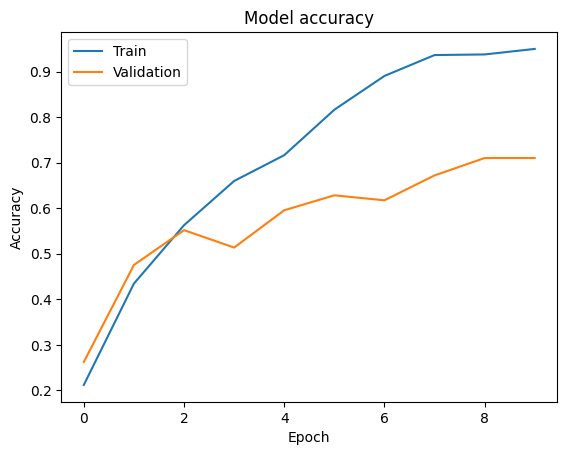

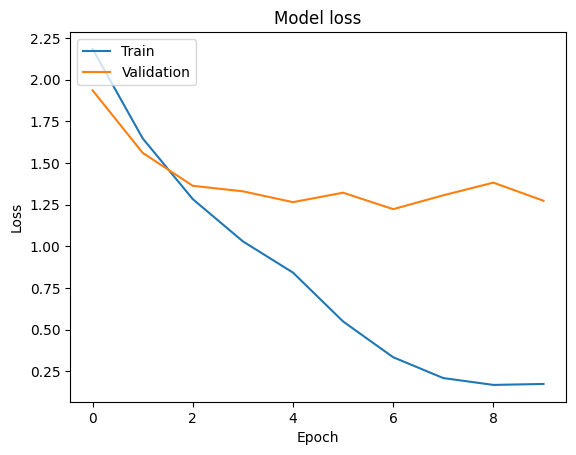

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate predictions on the test data
predictions = model.predict(test_generator)
predicted_classes = tf.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes

# Generate classification report
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 713ms/step
                            precision    recall  f1-score   support

            BA- cellulitis       0.19      0.18      0.18        33
               BA-impetigo       0.12      0.15      0.13        20
           FU-athlete-foot       0.19      0.19      0.19        32
            FU-nail-fungus       0.19      0.12      0.15        33
               FU-ringworm       0.10      0.09      0.09        23
PA-cutaneous-larva-migrans       0.00      0.00      0.00        25
             VI-chickenpox       0.10      0.12      0.11        34
               VI-shingles       0.14      0.18      0.16        33

                  accuracy                           0.13       233
                 macro avg       0.13      0.13      0.13       233
              weighted avg       0.13      0.13      0.13       233



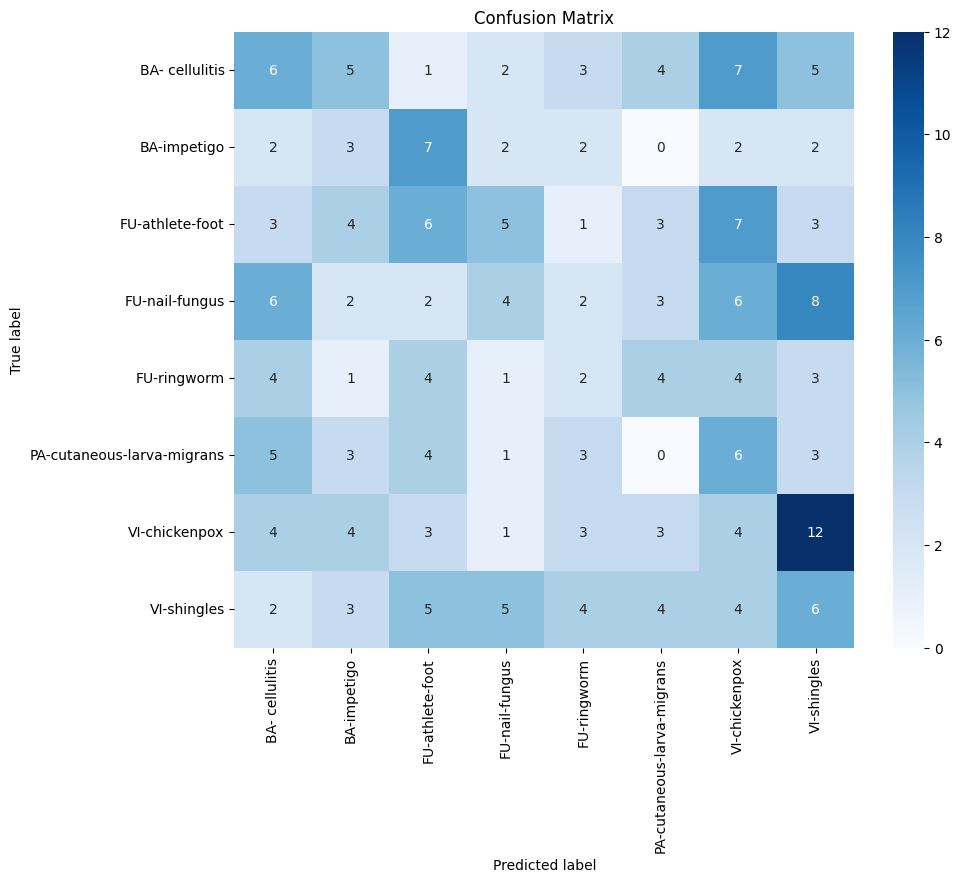

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

# Step 1: Upload the image
uploaded = files.upload()

# After uploading, the image will be stored in Colab's temporary storage.
# If the uploaded file is named 'th.jpeg', it will be saved at '/content/th.jpeg'

# Step 2: Define the function to load and predict
def load_and_predict(image_path):
    try:
        # Load and preprocess the image
        img = image.load_img(image_path, target_size=(150, 150))
        img_array = image.img_to_array(img) / 255.0  # Rescale to [0, 1]
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Make predictions
        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions[0])  # Get class index
        predicted_class_label = list(test_generator.class_indices.keys())[predicted_class_index]  # Get class label

        return predicted_class_index, predicted_class_label, test_generator.class_indices  # Return index, label, and mapping
    except FileNotFoundError:
        return None, f"Error: The file {image_path} was not found.", None
    except Exception as e:
        return None, f"An error occurred: {e}", None

# Example usage:
# Adjust the path to match the uploaded file name, e.g., '/content/th.jpeg'
predicted_class_index, predicted_class_label, class_indices = load_and_predict('/content/th.jpeg')

if predicted_class_index is not None:
    print(f'Predicted class index: {predicted_class_index}')
    print(f'Predicted class label: {predicted_class_label}')
    print(f'Class labels: {class_indices}')
else:
    print(predicted_class_label)  # Print the error message


Saving th.jpeg to th (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Predicted class index: 3
Predicted class label: FU-nail-fungus
Class labels: {'BA- cellulitis': 0, 'BA-impetigo': 1, 'FU-athlete-foot': 2, 'FU-nail-fungus': 3, 'FU-ringworm': 4, 'PA-cutaneous-larva-migrans': 5, 'VI-chickenpox': 6, 'VI-shingles': 7}


In [ ]:
"from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

def build_model(hp):
    model = models.Sequential()

    # First Conv Layer
    model.add(layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
        activation='relu',
        input_shape=(150, 150, 3)
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second Conv Layer
    model.add(layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=64, max_value=256, step=64),
        kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
        activation='relu'
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    # Third Conv Layer
    model.add(layers.Conv2D(
        filters=hp.Int('conv_3_filter', min_value=128, max_value=512, step=128),
        kernel_size=hp.Choice('conv_3_kernel', values=[3, 5]),
        activation='relu'
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten and Dense Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(
        units=hp.Int('dense_units', min_value=64, max_value=256, step=64),
        activation='relu'
    ))
    model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

    # Compile model
    model.compile(
        optimizer=Adam(
            learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
        ),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model
"

In [ ]:
"from keras_tuner import RandomSearch

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Number of different hyperparameter combinations to try
    executions_per_trial=1,  # Run each trial only once
    directory='tuner_results',  # Directory where results are saved
    project_name='skin_disease_tuning'
)
"

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
"tuner.search(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]
)"


Trial 5 Complete [00h 21m 58s]
val_accuracy: 0.14754098653793335

Best val_accuracy So Far: 0.6557376980781555
Total elapsed time: 02h 35m 08s


In [3]:
from google.colab import files

# This will open a file picker in Colab where you can upload your zipped dataset.
uploaded = files.upload()

Saving skin-disease-datasaet.zip to skin-disease-datasaet.zip


In [4]:
from zipfile import ZipFile
import os

# Replace 'skin-disease-datasaet.zip' with the actual uploaded zip file name.
with ZipFile('/content/skin-disease-datasaet.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset/')

# Verify the contents
os.listdir('/content/dataset/')


['skin-disease-datasaet']

In [5]:
# Import necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define paths to training and testing directories
train_dir = '/content/dataset/skin-disease-datasaet/train_set'
test_dir = '/content/dataset/skin-disease-datasaet/test_set'

# Step 1: Load Images using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important to keep labels in order
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important to keep labels in order
)

# Step 2: Extract features using a pre-trained model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  # Freeze the base model layers

# Create a new model that outputs features from the base model
model = Model(inputs=base_model.input, outputs=base_model.output)

# Extract features for the entire training set
features_train = model.predict(train_generator)
features_test = model.predict(test_generator)

# Step 3: Flatten the features
features_train = features_train.reshape((features_train.shape[0], -1))
features_test = features_test.reshape((features_test.shape[0], -1))

# Get labels from the generator
train_labels = train_generator.classes
test_labels = test_generator.classes

# Step 4: Standardize the features
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

# Step 5: Train SVM on the extracted features
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(features_train, train_labels)

# Step 6: Evaluate SVM on the test data
accuracy = svm_model.score(features_test, test_labels)
print(f"SVM Accuracy: {accuracy}")

Found 924 images belonging to 8 classes.
Found 233 images belonging to 8 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 216s 7s/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 56s 7s/step
SVM Accuracy: 0.9141630901287554


In [6]:
# Calculate the training accuracy
training_accuracy = svm_model.score(features_train, train_labels)
print(f"SVM Training Accuracy: {training_accuracy * 100:.2f}%")


SVM Training Accuracy: 100.00%


Saving th (3).jpeg to th (3).jpeg
Uploaded image: th (3).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
Diagnosis Result: BA- cellulitis


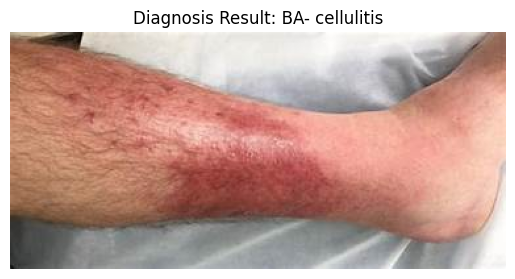

In [8]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Function to upload images
def upload_image():
    uploaded = files.upload()  # Upload image files
    for filename in uploaded.keys():
        img_path = filename
        print(f'Uploaded image: {img_path}')
        return img_path

# Function to preprocess the uploaded image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Resize image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Rescale to [0, 1]
    return img_array

# Function to extract features from the uploaded image
def extract_features(img_array):
    features = model.predict(img_array)  # Use the VGG16 model to extract features
    features = features.reshape((features.shape[0], -1))  # Flatten features
    return scaler.transform(features)  # Standardize features

# Function to diagnose allergy from the uploaded image
def diagnose_allergy(img_path):
    img_array = preprocess_image(img_path)  # Preprocess the image
    features = extract_features(img_array)  # Extract features
    prediction = svm_model.predict(features)  # Predict using SVM
    return prediction  # Return predicted class

# Upload and diagnose an image
uploaded_image_path = upload_image()  # Upload an image
diagnosis = diagnose_allergy(uploaded_image_path)  # Diagnose the uploaded image

# Map prediction to labels (update with your actual class names)
class_names = train_generator.class_indices  # Get class indices
inv_class_names = {v: k for k, v in class_names.items()}  # Inverse mapping
result = inv_class_names[diagnosis[0]]  # Get the predicted class name

# Display the result
print(f"Diagnosis Result: {result}")

# Display the uploaded image
img = image.load_img(uploaded_image_path)
plt.imshow(img)
plt.axis('off')
plt.title(f"Diagnosis Result: {result}")
plt.show()
